# Bikeshare数据集上的特征工程

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。根据每天的天气信息，预测该天的单车共享骑行量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数（作业只需使用该文件）
hour.csv: 按小时计的单车共享次数（无需理会）
readme：数据说明文件

2)	字段说明
Instant记录号
Dteday：日期
Season：季节（1=春天、2=夏天、3=秋天、4=冬天）
yr：年份，(0: 2011, 1:2012)
mnth：月份( 1 to 12)
hr：小时 (0 to 23)  （只在hour.csv有，作业忽略此字段）
holiday：是否是节假日
weekday：星期中的哪天，取值为0～6
workingday：是否工作日
1=工作日 （是否为工作日，1为工作日，0为非周末或节假日
weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
temp：气温摄氏度
atemp：体感温度
hum：湿度
windspeed：风速
casual：非注册用户个数
registered：注册用户个数
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

casual、registered和cnt三个特征均为要预测的y

## 导入必要的工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 1000

# pandas display data frames as tables
from IPython.display import display, HTML

## 读入数据

数据预处理对训练数据和测试数据需进行同样处理，因此将二者一起读入

In [2]:
# 读入数据
train = pd.read_csv("day.csv")
train.head()
#print("train : " + str(train.shape))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


没有缺失数据

## 数据探索

In [4]:
#对数据值型特征，用常用统计量观察其分布
train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#对类别型特征，观察其取值范围及直方图
categorical_features = ['season','mnth','weathersit','weekday']
for col in categorical_features:
    print ('\n%s属性的不同取值和出现的次数'%col)
    print (train[col].value_counts())
    train[col] = train[col].astype('object')


season属性的不同取值和出现的次数
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth属性的不同取值和出现的次数
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weathersit属性的不同取值和出现的次数
1    463
2    247
3     21
Name: weathersit, dtype: int64

weekday属性的不同取值和出现的次数
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


类别型特征的取值不多
类别型特征可以采用独热编码（One hot encoding）/哑编码

## 每年的分布

/home/xumeiyu/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


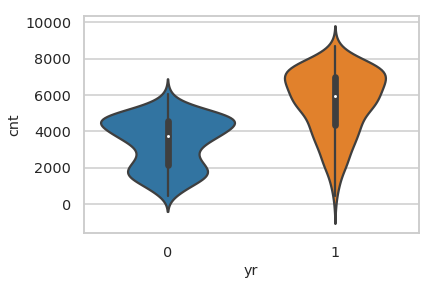

In [6]:
sn.violinplot(data=train[['yr',
                          'cnt']],
              x="yr",y="cnt")

2011年和2012年的分布差异很大

## 一年中每天的骑车量

[Text(0.5, 1.0, 'dayly distribution of counts')]

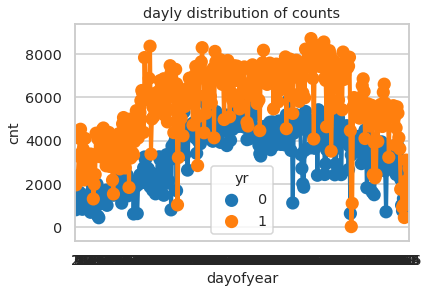

In [7]:
import datetime

train['date'] = pd.to_datetime(train['dteday'])
train['dayofyear'] = train["date"].dt.dayofyear  #减今年的第几天

fig,ax = plt.subplots()
sn.pointplot(data=train[['dayofyear',
                           'cnt',
                           'yr']],
             x='dayofyear',y='cnt',
             hue='yr',ax=ax)
ax.set(title="dayly distribution of counts")

相邻天的骑车数目好像不是特别连续，可以不考虑增加时序特征（y_(t-1) - y_(t-2)...）

## 季节与骑车数量的关系

[Text(0.5, 1.0, 'Seasonly distribution of counts')]

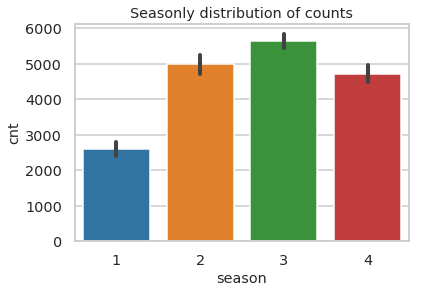

In [15]:
fig,ax = plt.subplots()
sn.barplot(data=train[['season',
                       'cnt']],
           x="season",y="cnt")
ax.set(title="Seasonly distribution of counts")

## 月份与骑车数量的关系

[Text(0.5, 1.0, 'Monthly distribution of counts')]

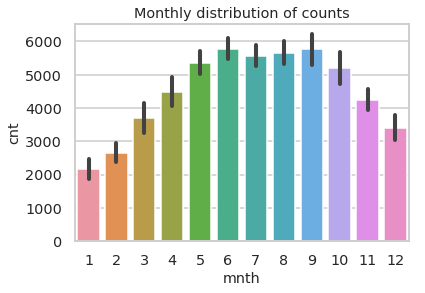

In [10]:
fig,ax = plt.subplots()
sn.barplot(data=train[['mnth',
                       'cnt']],
           x="mnth",y="cnt")
ax.set(title="Monthly distribution of counts")

## 天气和骑车数目的关系

In [ ]:
fig,ax = plt.subplots()
sn.barplot(data=train[['weathersit',
                       'cnt']],
           x="weathersit",y="cnt")
ax.set(title="weathersit distribution of counts")

## 工作日和节假日的分布

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data=train,x='holiday',y='cnt',hue='season',ax=ax1)
sn.barplot(data=train,x='workingday',y='cnt',hue='season',ax=ax2)

## 相关性

In [ ]:
corrMatt = train[["temp","atemp",
                  "hum","windspeed",
                  "casual","registered",
                  "cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

体感温度和温度高度相关
目标cnt与温度正相关、湿度和风速负相关